# Communities over Time

In [4]:
# automatically reload imports before executing any line in case you changed something
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import read_graph
import viz
import utils

In [20]:
#df = pd.read_csv("../data/raw/Postings_01052019_15052019.csv", delimiter=";")
df = utils.read_all_postings()
df_inland = df[df["ArticleChannel"] == "Inland"]
df_inland.head()

df_votes = utils.read_all_votes()

In [21]:
df_inland["ID_Article"].value_counts()[:10]

2000103364196    12042
2000103990942     5173
2000103773909     4789
2000103772847     4290
2000103578888     3918
2000103928932     3748
2000102386715     3582
2000103442116     3312
2000103640150     3269
2000103519155     3164
Name: ID_Article, dtype: int64

In [22]:
# "Welcher ""Austausch"" der Bevölkerung in Österreich tatsächlich stattfindet"
art_selected = df_inland[df_inland["ID_Article"] == 2000102386715]
p_ids = art_selected["ID_Posting"].unique()

In [23]:
votes_selected = df_votes[df_votes["ID_Posting"].isin(p_ids)]

In [24]:
joined = art_selected.merge(votes_selected, on="ID_Posting", suffixes=("_p", "_v"))

In [49]:
#joined.shape
joined.head()

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity_p,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,...,UserCommunityName_p,UserGender_p,UserCreatedAt_p,ID_CommunityIdentity_v,VoteNegative,VotePositive,VoteCreatedAt,UserCommunityName_v,UserGender_v,UserCreatedAt_v
0,1041126236,1.041125e+09,237970,vollkommen richtig.,bei aller unsympathie der F und konsorten hilf...,2019-05-03 15:13:25.120,2000102386715,2019-05-03 11:45:14.00,"Welcher ""Austausch"" der Bevölkerung in Österre...",Inland,...,sysiphos,m,2000-08-29 15:27:20.000,164185,0,1,2019-05-03 17:17:19.247,Montgomery Scott,m,2003-09-29 11:16:35.573
1,1041126236,1.041125e+09,237970,vollkommen richtig.,bei aller unsympathie der F und konsorten hilf...,2019-05-03 15:13:25.120,2000102386715,2019-05-03 11:45:14.00,"Welcher ""Austausch"" der Bevölkerung in Österre...",Inland,...,sysiphos,m,2000-08-29 15:27:20.000,637941,0,1,2019-05-03 16:07:59.710,...ein zeitzeuge,NaN,2017-08-21 13:12:06.167
2,1041126236,1.041125e+09,237970,vollkommen richtig.,bei aller unsympathie der F und konsorten hilf...,2019-05-03 15:13:25.120,2000102386715,2019-05-03 11:45:14.00,"Welcher ""Austausch"" der Bevölkerung in Österre...",Inland,...,sysiphos,m,2000-08-29 15:27:20.000,582717,0,1,2019-05-03 15:28:45.790,Biggi 1,w,2016-05-22 08:18:22.093
3,1041126236,1.041125e+09,237970,vollkommen richtig.,bei aller unsympathie der F und konsorten hilf...,2019-05-03 15:13:25.120,2000102386715,2019-05-03 11:45:14.00,"Welcher ""Austausch"" der Bevölkerung in Österre...",Inland,...,sysiphos,m,2000-08-29 15:27:20.000,210864,0,1,2019-05-03 17:36:15.280,StinkyTurner,m,2001-07-26 08:26:51.000
4,1041126236,1.041125e+09,237970,vollkommen richtig.,bei aller unsympathie der F und konsorten hilf...,2019-05-03 15:13:25.120,2000102386715,2019-05-03 11:45:14.00,"Welcher ""Austausch"" der Bevölkerung in Österre...",Inland,...,sysiphos,m,2000-08-29 15:27:20.000,519794,0,1,2019-05-03 19:53:15.217,schaumbär,m,2000-08-29 15:12:04.000


In [45]:
g_pos = read_graph.get_users_voted_other_users(postings=art_selected, votes=votes_selected)
g_neg = read_graph.get_users_voted_other_users(postings=art_selected, votes=votes_selected, positive_vote=False)

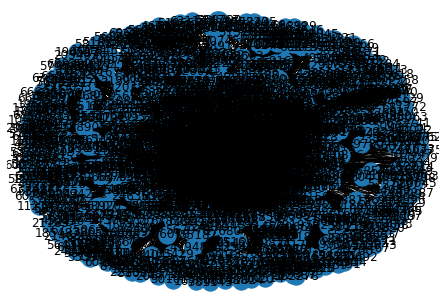

In [46]:
nx.draw(g_pos, with_labels=True, arrows=False)
